In [1]:
# May 2023

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms

In [4]:
model = models.resnet34(pretrained=True)

/home/sbn/miniconda3/envs/deeplearning0/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/sbn/miniconda3/envs/deeplearning0/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/sbn/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100.0%


In [5]:
# There are two ways to see the weights:

In [6]:
# 1)
# list(model.parameters())

In [7]:
# 2)
# model.state_dict()

In [8]:
for name, param in model.state_dict().items():
    print(name)
#     print(param)

conv1.weight
bn1.weight
bn1.bias
bn1.running_mean
bn1.running_var
bn1.num_batches_tracked
layer1.0.conv1.weight
layer1.0.bn1.weight
layer1.0.bn1.bias
layer1.0.bn1.running_mean
layer1.0.bn1.running_var
layer1.0.bn1.num_batches_tracked
layer1.0.conv2.weight
layer1.0.bn2.weight
layer1.0.bn2.bias
layer1.0.bn2.running_mean
layer1.0.bn2.running_var
layer1.0.bn2.num_batches_tracked
layer1.1.conv1.weight
layer1.1.bn1.weight
layer1.1.bn1.bias
layer1.1.bn1.running_mean
layer1.1.bn1.running_var
layer1.1.bn1.num_batches_tracked
layer1.1.conv2.weight
layer1.1.bn2.weight
layer1.1.bn2.bias
layer1.1.bn2.running_mean
layer1.1.bn2.running_var
layer1.1.bn2.num_batches_tracked
layer1.2.conv1.weight
layer1.2.bn1.weight
layer1.2.bn1.bias
layer1.2.bn1.running_mean
layer1.2.bn1.running_var
layer1.2.bn1.num_batches_tracked
layer1.2.conv2.weight
layer1.2.bn2.weight
layer1.2.bn2.bias
layer1.2.bn2.running_mean
layer1.2.bn2.running_var
layer1.2.bn2.num_batches_tracked
layer2.0.conv1.weight
layer2.0.bn1.weight
laye

In [8]:
# how to know the model's layers info?

In [9]:
model.conv1.in_channels
model.conv1.out_channels
model.conv1.kernel_size

(7, 7)

In [10]:
model.conv1

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [11]:
model.state_dict()['conv1.weight'].shape

torch.Size([64, 3, 7, 7])

In [12]:
# all layers
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [13]:
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
img = image.imread("data/train/dogs/dog_32.jpg")
import torchvision.transforms.functional as F
img = F.to_pil_image(img)

In [14]:
import torchvision

In [15]:
tranformT = torchvision.transforms.Compose([
        transforms.Resize(256),
#         transforms.CenterCrop(100),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], 
                             [0.229, 0.224, 0.225])
    ])

In [16]:
img_T = tranformT(img)

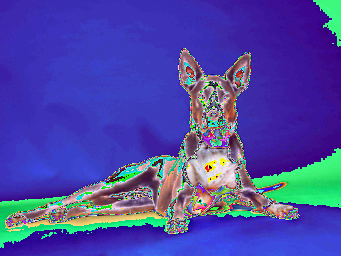

In [17]:
 F.to_pil_image(img_T)

In [18]:
img_T.shape

torch.Size([3, 256, 341])

In [19]:
# For adding a dim into the 0-th dim, i.e. making room for batches, tow possible ways are
# suggested:
# 1)
# new_img = tranformT(img).reshape(1,img_T.shape[0], img_T.shape[1], img_T.shape[2])

In [20]:
# 2)
img_T.unsqueeze(0).shape

torch.Size([1, 3, 256, 341])

In [21]:
img_T_sqzed = img_T.unsqueeze(0)

In [22]:
model(img_T_sqzed).shape

[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.


torch.Size([1, 1000])

![image](resnet34.png)

In [23]:
# So the model works...
# In ResNet34, the last layer is a fully-connected layer 
# with 1000 neurons. Since we are doing binary classification 
# we will alter the final layer to have two neurons.

In [24]:
# so we can either do fine-tuning or feature extracting:

In [112]:
# I want to have binary cat/dog classification:
# So, I replace the last fully connected (fc) layer with this:
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

In [113]:
model(img_T_sqzed).shape

torch.Size([1, 2])

In [114]:
model(img_T_sqzed)

tensor([[-0.9421, -0.1490]], grad_fn=<AddmmBackward>)

In [ ]:
# Here I'm using a small dataset from Kaggle in [2].

In [115]:
# Putting images in folder
# You don't need to do much. Just make two 'data/train' and 'data/test' folders.
# in these two folders you need to make folders for your classes: here 'cat' and 'dog'.
# now you put all images in these relavent folders. That's it. As the last step
# you should introduce these ImageFolders to DataLoader class: 

In [140]:
# this one will transfoms the entire images. WoW!
train_set = datasets.ImageFolder("data/train",tranformT)
val_set   = datasets.ImageFolder("data/train",tranformT)
  
train_loader = torch.utils.data.DataLoader(train_set, batch_size=4,
                                       shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=4,  
                                       shuffle=True, num_workers=4)
classes = train_set.classes

In [117]:
classes

['cats', 'dogs']

In [ ]:



    
# Now one can apply either feature extraction (freezing resnet34) or fine-tuneing (uncomment if you 
# like):    

In [143]:
# Training on my dataset  while finetuning
# model = models.resnet34(pretrained=True)


# while freezing Resnet34 (using for feature extraction).:
for param in model.parameters():
    param.requires_grad = False
modelOutputFeats = model.fc.in_features
model.fc = nn.Linear(modelOutputFeats, len(classes))
# model = model.to(config.DEVICE)    

In [162]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# If you're using feature extraction (freezing), this one is suggested:
# add 'model.fc.parameters()' at: 
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# However, they are not different if you set these lines earlier:
# for param in model.parameters():
#     param.requires_grad = False

In [171]:
from tqdm import tqdm
for e in tqdm(range(100000000)): 
    pass

 13%|███▏                     | 12951187/100000000 [00:03<00:24, 3511571.02it/s]


KeyboardInterrupt: 

In [174]:
epoch = 4    
from tqdm import tqdm

In [175]:
model.train()

# for epoch in range(25):

for e in tqdm(range(epoch)): 
 
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    print(running_loss)
print('Finished Training')

 25%|███████████▎                                 | 1/4 [00:28<01:26, 28.71s/it]

40.997608966659755


 50%|██████████████████████▌                      | 2/4 [00:59<01:00, 30.20s/it]

60.43875474348897


 50%|██████████████████████▌                      | 2/4 [01:24<01:24, 42.28s/it]


KeyboardInterrupt: 

In [124]:
class_correct = [0, 1 ]
class_total = [0, 1]
with torch.no_grad():
    for i, data in enumerate(val_loader, 0):
            inputs, labels = data
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
            for i in range(2):
                print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of  cats : 100 %
Accuracy of  dogs : 100 %
Accuracy of  cats : 100 %
Accuracy of  dogs : 100 %
Accuracy of  cats : 100 %
Accuracy of  dogs : 87 %
Accuracy of  cats : 100 %
Accuracy of  dogs : 90 %
Accuracy of  cats : 100 %
Accuracy of  dogs : 83 %
Accuracy of  cats : 100 %
Accuracy of  dogs : 85 %
Accuracy of  cats : 86 %
Accuracy of  dogs : 85 %
Accuracy of  cats : 88 %
Accuracy of  dogs : 81 %
Accuracy of  cats : 89 %
Accuracy of  dogs : 83 %
Accuracy of  cats : 90 %
Accuracy of  dogs : 80 %
Accuracy of  cats : 90 %
Accuracy of  dogs : 75 %
Accuracy of  cats : 90 %
Accuracy of  dogs : 74 %
Accuracy of  cats : 88 %
Accuracy of  dogs : 75 %
Accuracy of  cats : 85 %
Accuracy of  dogs : 75 %
Accuracy of  cats : 86 %
Accuracy of  dogs : 77 %
Accuracy of  cats : 84 %
Accuracy of  dogs : 78 %
Accuracy of  cats : 86 %
Accuracy of  dogs : 78 %
Accuracy of  cats : 86 %
Accuracy of  dogs : 77 %
Accuracy of  cats : 87 %
Accuracy of  dogs : 78 %
Accuracy of  cats : 88 %
Accuracy of  dogs

KeyboardInterrupt: 

In [176]:
model.eval()

from PIL import Image
image_path = "data/train/dogs/dog_32.jpg" # change this to the name of your image file.def predict_image(image_path, model):
image = Image.open(image_path)
image_tensor = tranformT(image)
image_tensor = image_tensor.unsqueeze(0)

output = model(image_tensor)
index = output.argmax().item()
if index == 0:
    print("Cat")
elif index == 1:
    print("Dog")
    
# or:
# print(classes[index])


Dog
dogs


In [177]:
import os
os.cpu_count()

8

### Resources:


[1] http://localhost:8888/notebooks/DeepLearning_practice/notebooks/tranferLearning/Resnet34.ipynb     
[2] https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification?resource=download

[3] https://harinramesh.medium.com/transfer-learning-in-pytorch-f7736598b1ed